> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [ ]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [30]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
import pandas as pd 
import matplotlib.pyplot as plt
% matplotlib inline

df = pd.read_csv('tmdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [36]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.



df.drop_duplicates(inplace=True)# remove dublication 
sum(df.duplicated())
df.dropna(inplace=True) #drop all NA value

df = df.query('revenue >= 1')# drop the values of revenue =0
df = df.query('budget >= 1')# drop the values of buget =0
df.to_csv('tmdb-movies_edited.csv', index=False)# saving the new file 
df = pd.read_csv('tmdb-movies_edited.csv')# reading the new file 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

## Q1: Is the profit of movies bussiness is increasing over the years or not? 

In [37]:
df['profit'] = df['revenue']-df['budget'] #creating new colume for profit
df # show the new result 

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08,397950503
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08,285603537
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08,487380321
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09,1082730962
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08,678708609


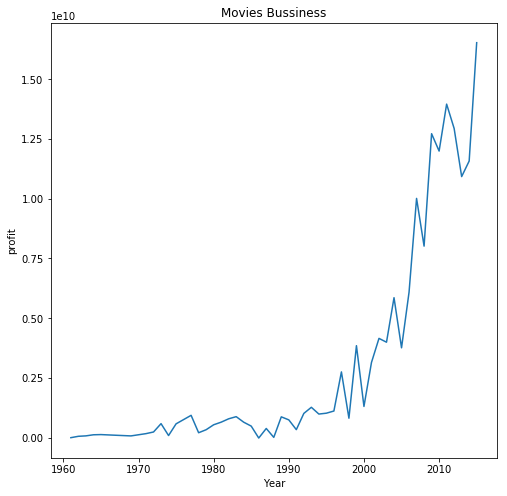

In [38]:
df.groupby('release_year', axis=0).sum()['profit'].plot(x='release_year', y='profit', kind='line',figsize=(8,8)) #ploting in line 
plt.title('Movies Bussiness')
plt.xlabel('Year')
plt.ylabel('profit');

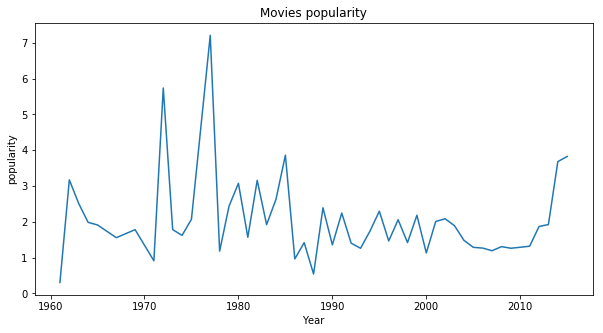

In [64]:
dfz = df.groupby('release_year', axis=0).mean()['popularity']
dfz
dfz.plot(x='release_year', y='popularity', kind='line',figsize=(10,5))
plt.title('Movies popularity')
plt.xlabel('Year')
plt.ylabel('popularity');


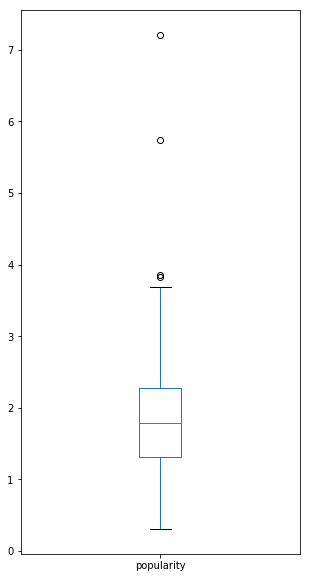

In [62]:
dfz.plot(x='release_year', y='popularity', kind='box',figsize=(5,10))

### we can see the movies business had incresed dramtically over the last deacyes from 1960 till 2015. we had investigated two variables which is profit and popularity(last 5 years) which shows both incresing dramatically. also, i show a graph of box that shows where  mean popularity is. which gives insight on the high value to the prvious graph. another insight we can see the movies industies was passing in a good period between 1970 and 1980 but maybe the prices was down.

## Q2: what is the best movies in 2015 which movies in 2015 having rating more than 7.5. why movie bussines had increase last 3 years? 

### to answer first part question we have to check last year best movies and for the second part we need to check last 3 years voting rate. 

In [42]:
lastyear_mov = df.query('release_year >= 2015') # filter all 2015 movies
move_r_7 = lastyear_mov.query('vote_average >= 7.5 ') # filter voting avr above 7 
move_r_7 = move_r_7.query('vote_count >= 1000 ') # filter number of counts to check the truth of voting 



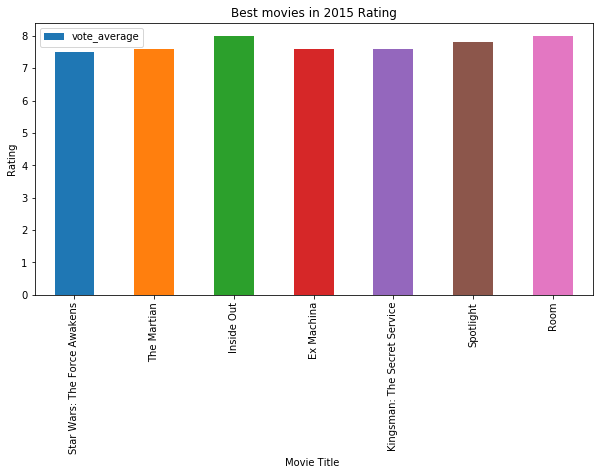

In [52]:
move_r_7.plot(x='original_title', y='vote_average', kind='bar',figsize=(10,5))
plt.title('Best movies in 2015 Rating')
plt.xlabel('Movie Title ')
plt.ylabel('Rating');

### we can see from the bar chart that inside out and room has the highest rating in 2015 

In [44]:
lastyear_mov = df.query('release_year >= 2015') # filter all 2015 movies
#move_r_7 = lastyear_mov.query('vote_average >= 7.5 ') # filter voting avr above 7 
move_r_7 = move_r_7.query('vote_count >= 1000 ') # filter number of counts to check the truth of voting 

mean2015 = move_r_7['vote_average'].mean()
mean2015

7.728571428571429

In [45]:
mov_2014 = df.query('release_year == 2014') # filter all 2014 movies
mov_2014 = mov_2014.query('vote_count >= 1000 ') # filter number of counts to check the truth of voting 
mean2014= mov_2014['vote_average'].mean()
mean2014

6.870588235294115

In [46]:
mov_2013 = df.query('release_year == 2013') # filter all 2013 movies
mov_2013 = mov_2013.query('vote_count >= 1000 ') # filter number of counts to check the truth of voting 
mean2013= mov_2013['vote_average'].mean()
mean2013

6.660526315789473

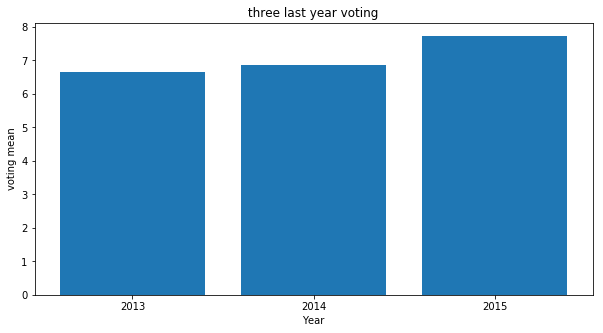

In [59]:
plt.figure(figsize=(10,5))
plt.bar([1, 2, 3], [mean2013, mean2014, mean2015], tick_label=['2013', '2014', '2015'])
plt.title(' three last year voting ')
plt.xlabel('Year')
plt.ylabel('voting mean');


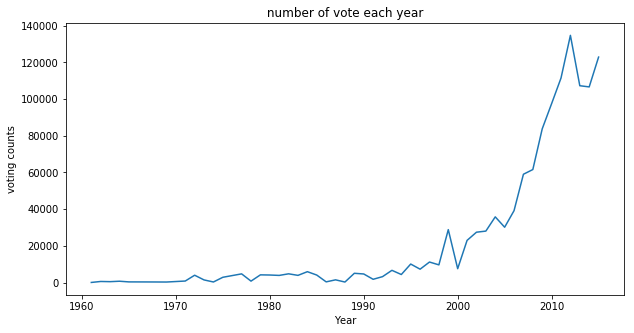

In [61]:
df.groupby('release_year', axis=0).sum()['vote_count'].plot(x='release_year', y='vote_count', kind='line',figsize=(10,5))
plt.title(' number of vote each year ')
plt.xlabel('Year')
plt.ylabel('voting counts');

### we can see from the bar chart that inside out and room has the highest rating in 2015. also, we has shows the best move in last year which i recomnd to watch and we had knew the reasons why bussiness movies had icreased beacuse the movies industries had improved dramatically. 

# conclusion :
### to sum up we had disscus the bussiness industry groth also we had seen which is best movie in 2015 finally we disscus the resons why there is growth in the bussiness industries. for reasons, i tried to show one rason but of course there is more reasons that not showen du to the limitation on data. 